In [92]:
import pandas as pd
import matplotlib.pyplot as plt

load data into dataframe

In [93]:
data = pd.read_csv('/content/datasets_549966_1296705_complete.csv')

In [94]:
data.head(3)

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0


In [95]:
data.shape

(3510, 10)

In [96]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       3510 non-null   object 
 1   Name of State / UT         3510 non-null   object 
 2   Latitude                   3510 non-null   float64
 3   Longitude                  3510 non-null   float64
 4   Total Confirmed cases      3510 non-null   int64  
 5   Death                      3510 non-null   int64  
 6   Cured/Discharged/Migrated  3510 non-null   int64  
 7   New cases                  3510 non-null   int64  
 8   New deaths                 3510 non-null   int64  
 9   New recovered              3510 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 274.3+ KB
None


In [97]:
data_num_india = data.groupby('Date')["Total Confirmed cases", "Cured/Discharged/Migrated", "Death"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [98]:
data_num_india.head(5)

,Total Confirmed cases,Cured/Discharged/Migrated,Death
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0
2020-02-02,3,0,0
2020-02-03,3,0,0


In [99]:
datakerala = data.loc[data['Name of State / UT']=='Kerala']
#df.loc[df['column_name'] == some_value]
#https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

In [100]:
datakerala

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3351,2020-06-25,Kerala,10.8505,76.2711,3603,22,1888,152,0,79
3386,2020-06-27,Kerala,10.8505,76.2711,3876,22,2008,273,0,120
3421,2020-06-28,Kerala,10.8505,76.2711,4071,22,2110,195,0,102
3456,2020-06-29,Kerala,10.8505,76.2711,4189,22,2152,118,0,42


data is updated till 30th june

In [101]:
data_num_india.tail(2)

,Total Confirmed cases,Cured/Discharged/Migrated,Death
Date,,,
2020-06-29,541033,321723,16475
2020-06-30,559836,334822,16893


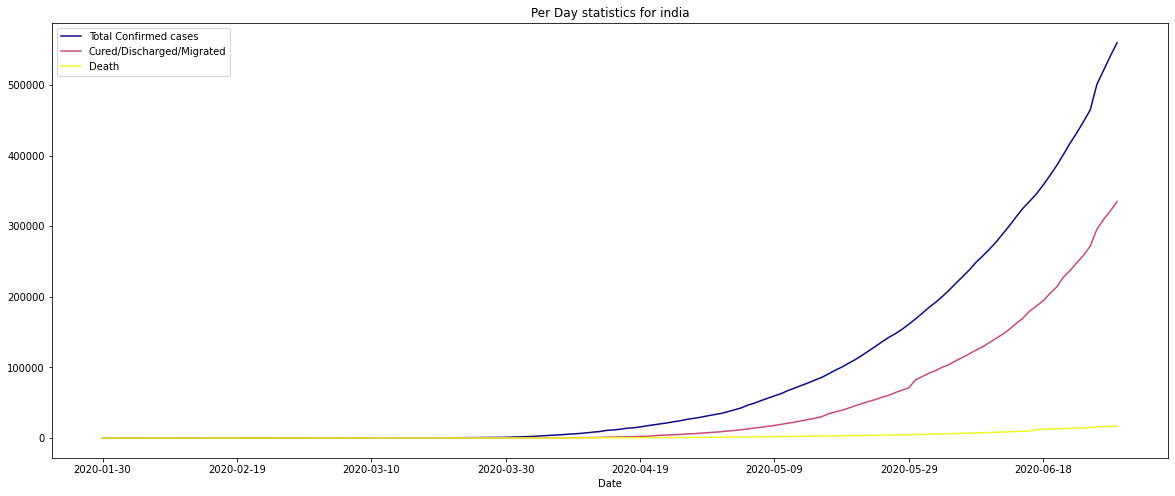

In [102]:
data_num_india.plot(figsize=(20,8),title='Per Day statistics for india',colormap='plasma')
plt.show()
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

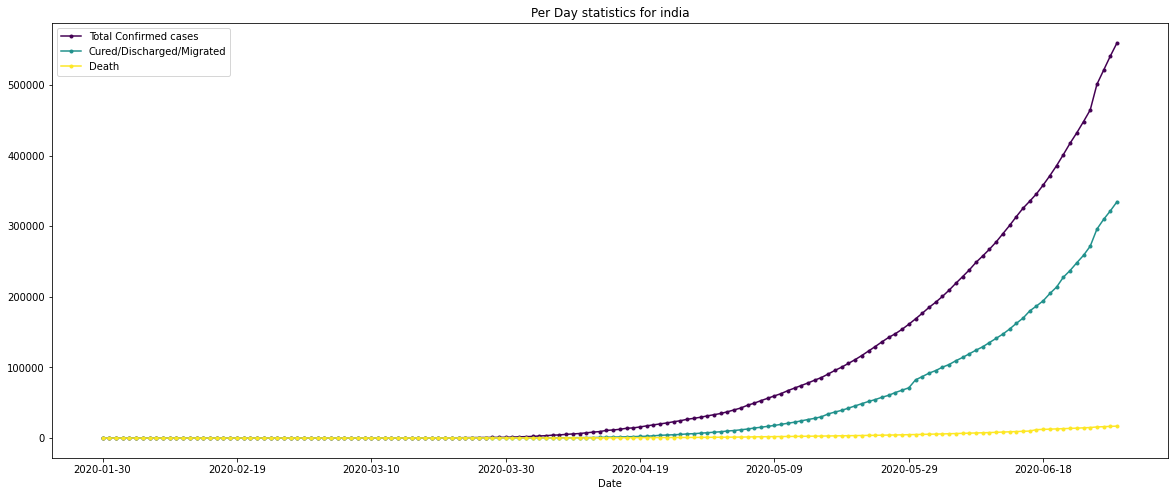

In [103]:
data_num_india.plot(figsize=(20,8),title='Per Day statistics for india',colormap='viridis',marker='.')
plt.show()
#https://matplotlib.org/3.1.1/api/markers_api.html

In [104]:
data_num_india.head(3)


,Total Confirmed cases,Cured/Discharged/Migrated,Death
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0


In [105]:
data_num_india.head(1)

,Total Confirmed cases,Cured/Discharged/Migrated,Death
Date,,,
2020-01-30,1,0,0


In [106]:
ds = datakerala.iloc[:,0]


In [107]:
ds.reset_index(drop=True, inplace=True)

In [108]:
ds

0      2020-01-30
1      2020-01-31
2      2020-02-01
3      2020-02-02
4      2020-02-03
          ...    
147    2020-06-25
148    2020-06-27
149    2020-06-28
150    2020-06-29
151    2020-06-30
Name: Date, Length: 152, dtype: object

In [109]:
type(ds)

pandas.core.series.Series

In [110]:
ya = data_num_india.pop('Total Confirmed cases')
ya.reset_index(drop=True, inplace=True)

In [111]:
ya


0           1
1           1
2           2
3           3
4           3
        ...  
147    464612
148    500930
149    521020
150    541033
151    559836
Name: Total Confirmed cases, Length: 152, dtype: int64

In [112]:
!pip install fbprophet

In [113]:
from fbprophet import Prophet
prophet_basic = Prophet()

In [114]:
input= pd.DataFrame()
input['ds'] = pd.to_datetime(ds)
input['y']=ya
input.head(2)

,ds,y
0,2020-01-30,1
1,2020-01-31,1


In [115]:
prophet_basic.fit(input)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [116]:
future= prophet_basic.make_future_dataframe(periods=10)
future.tail(2)

,ds
160,2020-07-09
161,2020-07-10


In [117]:
forecast=prophet_basic.predict(future)

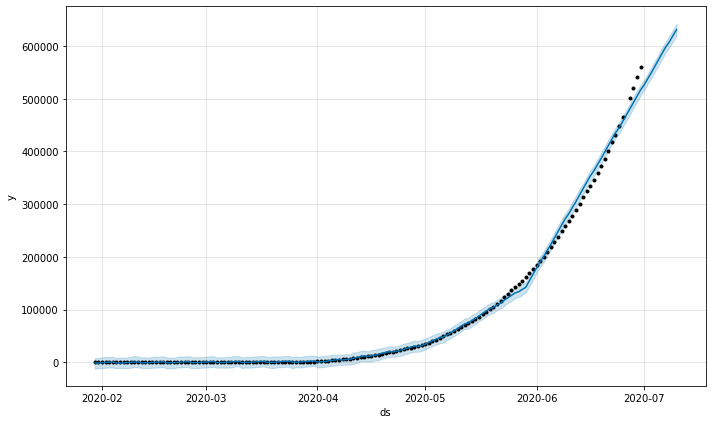

In [118]:
from fbprophet.plot import plot_plotly
fig1 =prophet_basic.plot(forecast)

In [119]:
predictions=forecast.tail(10)

In [120]:
predictions.round(0).head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
152,2020-07-01,527270.0,516293.0,535862.0,527270.0,527270.0,-920.0,-920.0,-920.0,-920.0,-920.0,-920.0,0.0,0.0,0.0,526349.0
153,2020-07-02,538915.0,528474.0,547804.0,538796.0,539039.0,-681.0,-681.0,-681.0,-681.0,-681.0,-681.0,0.0,0.0,0.0,538234.0
154,2020-07-03,550560.0,539328.0,559658.0,550145.0,550973.0,-906.0,-906.0,-906.0,-906.0,-906.0,-906.0,0.0,0.0,0.0,549654.0
155,2020-07-04,562205.0,551635.0,572431.0,561411.0,563050.0,-69.0,-69.0,-69.0,-69.0,-69.0,-69.0,0.0,0.0,0.0,562136.0
156,2020-07-05,573850.0,563831.0,584317.0,572585.0,575248.0,402.0,402.0,402.0,402.0,402.0,402.0,0.0,0.0,0.0,574252.0
